In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [29]:
# 데이터 불러오기
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
# DataFrame 만들기(건너뛰어도됨)
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
X = data.data
y = data.target

# PCA 수행 전 특성의 수
print(X.shape[1])

30


In [47]:
# StandradScaler로 특성들의 스케일 조정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

# 스케일링 후 특성의 수
print(X_scaled.shape[1])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

In [85]:
# PCA로 주성분 2개만 계산하여 가져오기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[:2]) # 2개 행의 값만 확인해보기

# 남겨진 주성분의 수
print(X_pca.shape[1])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]]
2


In [87]:
print(pca.explained_variance_ratio_)

# 첫번째 주성분은 원본데이터의 48% 정보(분산)를 가지고 있음
# 두번째 주성분은 원본데이터의 19% 정보(분산)를 가지고 있음

[0.44272026 0.18971182]


In [89]:
print(np.cumsum( pca.explained_variance_ratio_ ))

# 이 두 특성은 전체 데이터셋의 63%에 해당하는 정보를 가지고 있음
# 실제로 이 두 특성이 데이터셋 전체를 대표할수는 없음

[0.44272026 0.63243208]


In [91]:
# 각 주성분을 구성하는 원본 특성들의 가중치 배열 확인하기
pca.components_

# 성분이 2개라서 2 Rows
# Columns는 원본 데이터의 특성 수와 동일

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [93]:
# 각 주성분들에게 영향을 가장 많이 준 특성 찾기
# 절대값이 가장 큰 값의 인덱스
# 인덱스를 쉽게 찾기 위해 pandas.DataFrame으로 변환
pca_df = pd.DataFrame(pca.components_,
                      columns=data['feature_names'])
pca_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [97]:
for i in range(pca_df.shape[0]): # 행 수 만큼 반복
    pca_name = f'PC{i+1}'
    feature_name = pca_df.iloc[i].abs().idxmax() # 열의 인덱스는 특성 이름
    feature_index = pca_df.columns.get_loc(feature_name) # 특성이름으로 몇번째 열인지 숫자 가져오기
    max_weight = pca_df.iloc[i][feature_name]

    print(f'{pca_name} [{feature_name}]: {max_weight}, ({feature_index})')

PC1 [mean concave points]: 0.26085375838574254, (7)
PC2 [mean fractal dimension]: 0.36657547137872426, (9)


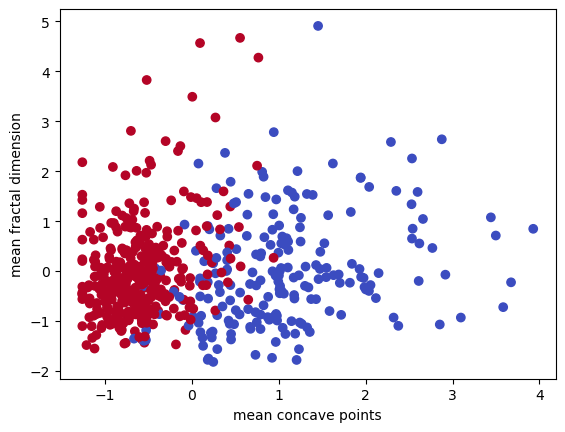

In [101]:
# PCA들에 영향을 많이 준 특성값들과 PCA를 시각화하여 비교해보기
# 1. 원본 데이터셋에서 PCA에 영향을 많이 준 
# 'mean concave points', 'mean fractal dimension'을 Scatter로 찍어보기
plt.scatter(
    X_scaled[:, 7], 
    X_scaled[:, 9],
    c=y,
    cmap='coolwarm'
)
plt.xlabel(data.feature_names[7])
plt.ylabel(data.feature_names[9])
plt.show()

In [103]:
pca_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


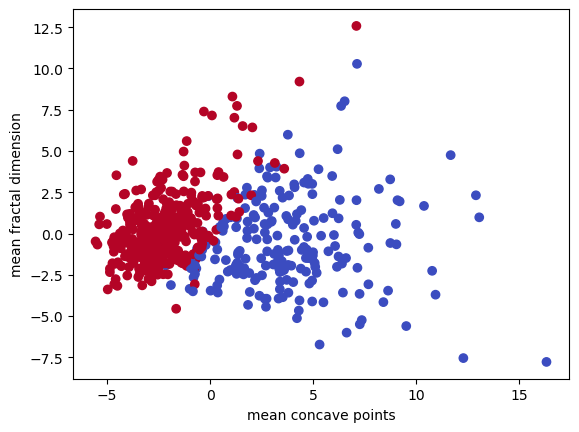

In [115]:
# PCA들에 영향을 많이 준 특성값들과 PCA를 시각화하여 비교해보기
# 2. PC1, PC2를 Scatter로 찍어보기
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap='coolwarm'
)
plt.xlabel(data.feature_names[7])
plt.ylabel(data.feature_names[9])
plt.show()

In [123]:
# PCA Data로 모델 훈련시키기
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=1234
)

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.88      0.97      0.92        69

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



In [129]:
# 원본 데이터(스케일만 조정된)로 학습 시켜볼까?
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=1234
)

In [131]:
model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        45
           1       0.93      1.00      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [135]:
# PCA 값들의 Loss율 확인해보기
X_from_pca = pca.inverse_transform(X_pca)
pca_loss = np.mean( (X_scaled - X_from_pca) ** 2 )
print(f'Loss: {pca_loss:.4f}')

Loss: 0.3676


In [137]:
# n_components를 변경하여 결과 확인해보기